In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

plt.style.use("classic")

# Analyse van de IR spectrografie

In [2]:
df = pd.read_csv("IR.csv", delimiter=";")
df, df.dtypes

(      Golfgetal  Absorbantie
 0         600.0       0.1440
 1         601.0       0.1450
 2         601.0       0.1470
 3         602.0       0.1500
 4         602.0       0.1530
 ...         ...          ...
 7048     4000.0       0.0353
 7049     4000.0       0.0353
 7050     4000.0       0.0352
 7051     4000.0       0.0352
 7052     4000.0       0.0351
 
 [7053 rows x 2 columns],
 Golfgetal      float64
 Absorbantie    float64
 dtype: object)

## Ruwe plot

**Opm:** Plot komt overeen met gegeven data van prof

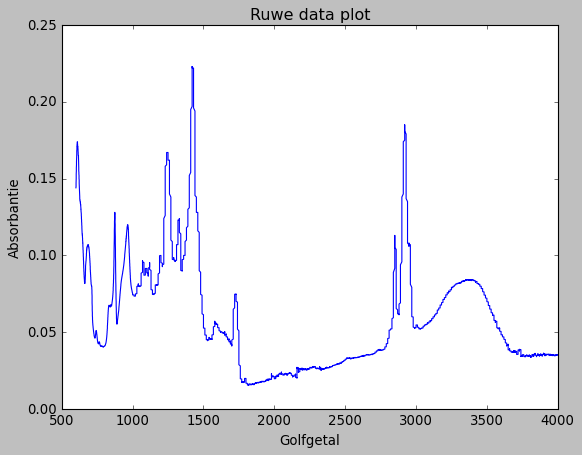

In [3]:
x = df["Golfgetal"]
y = df["Absorbantie"]

plt.plot(x, y)
plt.title("Ruwe data plot")
plt.xlabel("Golfgetal")
plt.ylabel("Absorbantie")
plt.savefig("figs/ir_ruw")

## Filteren van enkel belangrijkste punten

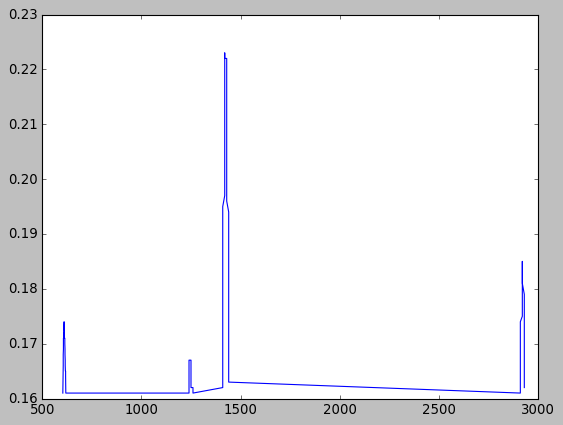

In [4]:
split_point = 0.16

df_pieken = df[df["Absorbantie"] > split_point]
plt.plot(df_pieken["Golfgetal"], df_pieken["Absorbantie"])

(Golfgetal      610.000
 Absorbantie      0.174
 Name: 20, dtype: float64,
 Golfgetal      1240.000
 Absorbantie       0.167
 Name: 1329, dtype: float64,
 Golfgetal      1420.000
 Absorbantie       0.223
 Name: 1709, dtype: float64,
 Golfgetal      2920.000
 Absorbantie       0.185
 Name: 4813, dtype: float64,
 Golfgetal      3360.0000
 Absorbantie       0.0843
 Name: 5722, dtype: float64)

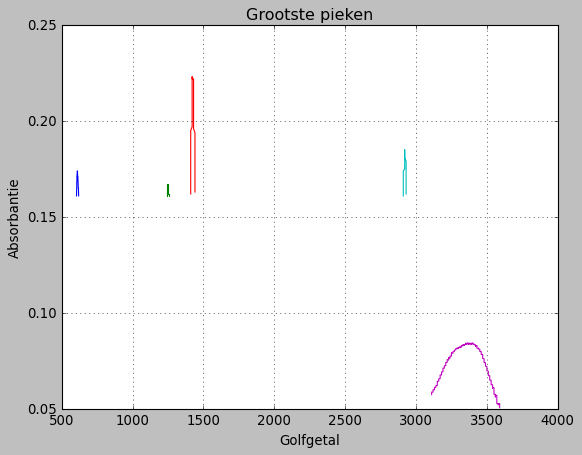

In [5]:
# Splitsen in pieken

def splits_pieken(pieken, begin = 1, end = 6000):
    df_piek = pieken[(begin < pieken["Golfgetal"]) & (pieken["Golfgetal"] < end)]
    plt.plot(df_piek["Golfgetal"], df_piek["Absorbantie"])
    return df_piek[df_piek["Absorbantie"] == df_piek["Absorbantie"].max()]

plt.title("Grootste pieken")
plt.xlabel("Golfgetal")
plt.ylabel("Absorbantie")
plt.grid(True)

df_max_pieken = splits_pieken(df_pieken,  500, 1000).iloc[0], \
splits_pieken(df_pieken, 1000, 1400).iloc[0], \
splits_pieken(df_pieken, 1400, 1500).iloc[0], \
splits_pieken(df_pieken, 1500, 4000).iloc[0], \
splits_pieken(df,        3100, 3600).iloc[0]

plt.savefig("figs/ir_pieken")

df_max_pieken

## Pieken

### Belangrijkste pieken
| Golfgetal ($cm^{-1}$) | Absorbantie | Oorzaak |
| --------- | ----------- | ------- |
| 610.000   | 0.174       | C-X (Halogeen-alkaan, C-Cl) |
| 1240.000  | 0.167       | C-O (Alcohol,Ester,Carboxyl acid) |
| 1420.000  | 0.223       | C=C (Arenes,aromatic) |
| 2920.000  | 0.185       | -C-H3 (alleenstaande piek) |
| 3360.0000 | 0.0843      | Breed, maar kleine piek (alcohol) |

### Opmerkelijk
* Groot dal tussen 1750-2800
  * Geen Carboxyl -> COOH = 2 pieken (2500-3300 + 1700)
  * Geen -C-O- -> piek rond 2100
* Geen zeer hoge frequenties (boven 3000) -> Geen anine/amide
* Waarschijnlijk -OH (alcohol) -> brede piek tussen 3200-3600 (klein in hoogte) + grotere piek C-O (1240)
* Waarschijnlijk halogeen -> -C-Cl piek 610
* Waarschijnlijk aromatisch -> piek 1420 C=O
* Alkyl -> -CH3 piek 2920

### IR bronnen
* [Tabel met mogelijke oplossingen](https://www.ocr.org.uk/images/302739-units-h032-and-h432-data-sheet.pdf)
* [Video met goede uitleg over bindingen](https://www.youtube.com/watch?v=WTmj_9VT5oE)